# Telco Customer Churn Prediction 

##  Project Summary 

**Objective:** Predict whether a telecom customer will churn using demographic, account, and service usage data.  
**Dataset:** ~7,000 customer records (public Kaggle dataset).  
**Approach:** Data cleaning, EDA, multiple ML models, and performance evaluation.  
**Key Results:** Showing model results, showing contract type, tenure, and monthly charges are strong churn predictors.  
**Tech Stack:** Python, Pandas, Scikit-learn, Seaborn, Matplotlib  

## Section 1 - Problem definition & project setup

This project uses the Telco Customer Churn dataset which is publically available on Kaggle. 
This dataset showcases whether a fictional telcommunications company retains/doesn't retain a customer. Customer data is shown in the columns, with each row representing a customer. 

The data set includes information about:


* **Customers who left within the last month** – the column is called Churn
* **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* **Customer account information** – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* **Demographic info about customers** – gender, age range, and if they have partners and dependen


The aims of this project include:


* use Exploratory Data Analysis (EDA) to determine the importance of attributes when evaluating Churn
* use machine learning models to predict whether the company retains a custommer or not
* use success metrics to determine the best model out of the models used

## Section 2 - Data quality check

The aim of this section is to make sure the dataset's values are of a quality ready for using in data analysis and the fitting of a model. This will include:

* checking for null values,
* detecting data type mismatches,
* checking for duplicate rows,
* checking for inconsistent values (e.g. "No " vs "No")


Importing the dataset and libraries:

In [1]:
# importing necessities
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# reading dataset into 'df'
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# output first 5 rows of the data set
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# outputting the num of rows by columns
df.shape

(7043, 21)

In [5]:
# ouput each column's info (non-null count, dtype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


When observing the information regarding the columns, the column 'TotalCharges' appears to have an object dtype.
As it normally contains float values, one possible explanation could be that some rows contain an empty string for its 'TotalCharges' value.

In [6]:
# output only the row 'TotalCharges' contains and empty string
df[df["TotalCharges"].str.contains(' ', na=False)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


This is shown above, 11 out of 7032 entries contain an empty string for 'TotalCharges'.

One reason this could be is that these are **new customers**, meaning that although they have a set monthly charge, they have not been with the company for a month yet.

In [7]:
# show numerical metrics for 'tenure' column
df["tenure"].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

However, as we can see from the metrics of the 'tenure' column, the minium tenure for any customer is a month, meaning that a total charge has to be set.

Another thing we can check is if there are any customers who have a total charge of £0. If this is the case, we could convert the blank cells to £0.



In [8]:
# show rows of where there are no total charges
df[df["TotalCharges"] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Due to this, we could argue that the rows containing a blank total charge are unfit for our analysis.

Converting the column to float dtype, turning any non-numeric values to NaN:

In [9]:
# convert 'TotalCharges' column to float dtype, errors to NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [10]:
# reveal sum of NaN values for total charges
df["TotalCharges"].isna().sum()

11

Dropping the 11 rows with NaN values:

In [11]:
# delete these from the table
df = df.dropna(subset=["TotalCharges"])

In [12]:
df["TotalCharges"].isna().sum()

0

In [13]:
df["TotalCharges"].dtype

dtype('float64')

CHecking to see if the object columns are consistent with their entries. This includes looking for entries with trailing whitespace, typos or inconsistent values:

In [14]:
#  for all object columns, print out all unique values in each, looking for anomilies
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    print(df[col].unique())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['No' 'Yes']


Making sure no rows are duplicated, as this could harm analysis and model fitting:

In [15]:
# output sum of duplicated rows
df.duplicated().sum()

0

## Section 3 - Data Visualisations & churn rates

In [16]:
# for each numerical column, output metrics for each
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Text(0.5, 1.0, 'Customer churn by gender')

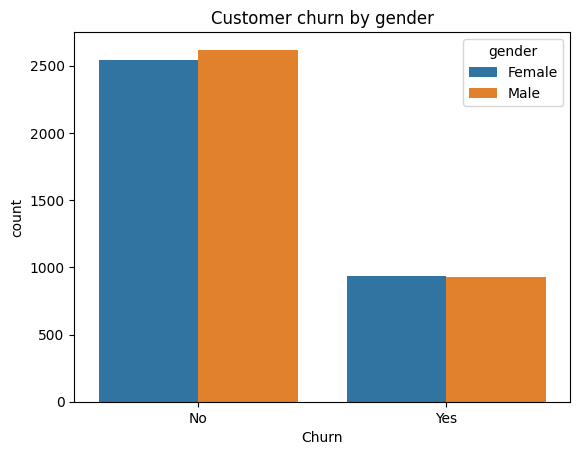

In [17]:
# show counts of churning filtered by gender
sns.countplot(x="Churn", hue="gender", data=df,)
plt.title("Customer churn by gender")

In [18]:
# rates of churn for each gender
df.groupby('gender')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)


gender
Female    26.959518
Male      26.204565
Name: Churn, dtype: float64

Since gender seems near 50/50 for both 'Yes' and 'No', we can infer that gender is not an important attribute to use when predicting whether a customer will churn or not.

Furthermore, there seems to be a lot more customers who do not churn compared to those who do. Due to this, using the accuracy success metric for our models may not be the best idea, since one class dominates the other. Other metrics can be used, such as precision, recall and F1 score.




Text(0, 0.5, 'Monthly amount charged')

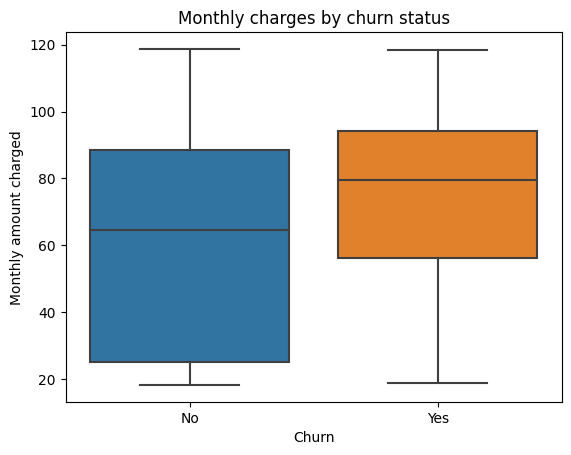

In [19]:
# boxplot, monthly amount charged vs churn status
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly charges by churn status")
plt.ylabel("Monthly amount charged")

In [20]:
# for each churn status, give the mean of the monthly charges
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     61.307408
Yes    74.441332
Name: MonthlyCharges, dtype: float64

A customer is more likely to churn when they are charged more monthly. This is seen by the mean average of monthly charges of churners being higher than those of non-churners. Additionally, Q1, Q1, Q3 and the range of churners are higher. The company could possibly amend this by making their prices more appropiate, and by also providing more benefits to a higher priced subscription.

Text(0.5, 1.0, 'Distribution of internet service')

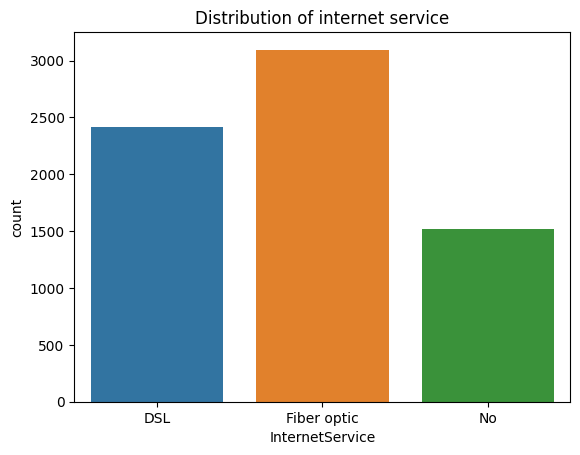

In [21]:
# count in the dataset for each internet service
sns.countplot(x="InternetService", data=df)
plt.title("Distribution of internet service")

Text(0.5, 1.0, 'Internet Service Provider by churn status')

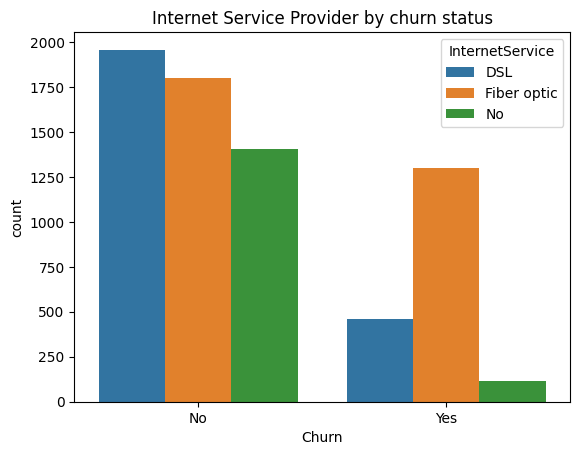

In [22]:
# the same count, but with respect to churn status
sns.countplot(x="Churn", hue="InternetService", data=df)
plt.title("Internet Service Provider by churn status")

The majority of those who churn use fiber optic as their choice of internet service. Fiber optic is also the most chosen service. **This could represent a lack of satisfaction with this type of utility.** If this were to be tackled, the company could allow the users to give feedback based on each internet service, and employ ways to tackle any criticisms.

In [23]:
# for each internet service, show the amount of churners
# give the percentage of these which were the fiber optic service
s = df[df["Churn"] == "Yes"].groupby("InternetService")["Churn"].count()
print(s)
print(f"Amount of churners who used the fiber optic service: {round((s.iloc[1] / s.sum()) * 100)}%")

InternetService
DSL             459
Fiber optic    1297
No              113
Name: Churn, dtype: int64
Amount of churners who used the fiber optic service: 69%


In [24]:
# do the same as above, but this time with non-churners
s = df[df["Churn"] == "No"].groupby("InternetService")["Churn"].count()
print(s)
print(f"Amount of non-churners who used the fiber optic service: {round((s.iloc[1] / s.sum()) * 100)}%")

InternetService
DSL            1957
Fiber optic    1799
No             1407
Name: Churn, dtype: int64
Amount of non-churners who used the fiber optic service: 35%


As we can see, those who do churn have a **69%** chance of using the fiber optic service, and those who do not have a **35%** chance. This shows that the internet service a customer uses is an important attribute in deciding churn.

Text(0.5, 1.0, 'Tenure by churn status')

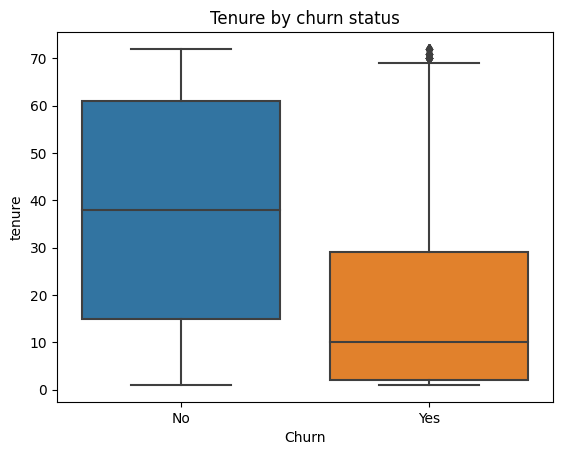

In [25]:
# boxplot, tenure vs churn status
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure by churn status")

People who stay longer tend to churn less. The company could tackle this problem by introducing new customers to incentives to stay, such as offers, discounts and so forth. To target longer staying users, the company could reduce subscription pricing after certain time stayed, or offer higher offers than lesser tenured users.

Text(0.5, 1.0, 'Churn w.r.t. senior citizenship')

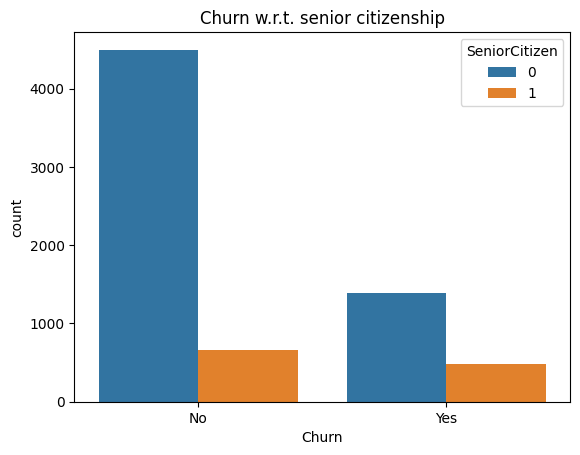

In [26]:
# churn count with respect to senior citizenship status
sns.countplot(x="Churn", hue="SeniorCitizen", data=df)
plt.title("Churn w.r.t. senior citizenship")

In [27]:
# crosstab table
pd.crosstab(df["SeniorCitizen"], df["Churn"])

Churn,No,Yes
SeniorCitizen,,
0,4497,1393
1,666,476


The percentage of churners within the senior citizen group:

In [28]:
# divide those who churned in the group by those who didn't, and multiply the result by 100
round((df[(df["Churn"] == "Yes") & (df["SeniorCitizen"] == 1)]["Churn"].count() / df[df["SeniorCitizen"] == 1]["Churn"].count()) * 100)

42

The percentage of churners within the non-senior citizen group:

In [29]:
# divide those who churned in the group by those who didn't, and multiply the result by 100
round((df[(df["Churn"] == "Yes") & (df["SeniorCitizen"] == 0)]["Churn"].count() / df[df["SeniorCitizen"] == 0]["Churn"].count()) * 100)

24

From these percentages (**42%** vs **24%**) we can see that senior citizens are much more likely to churn compared to non-senior citizens.

Text(0.5, 1.0, 'Churn with w.r.t. partnership')

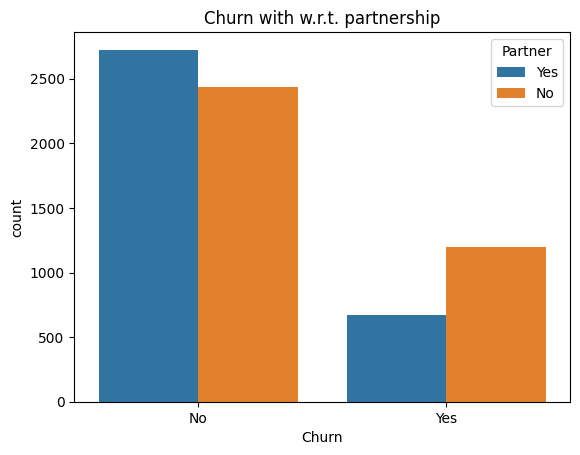

In [30]:
# churn count with respect to partnership status
sns.countplot(x="Churn", hue="Partner", data=df)
plt.title("Churn with w.r.t. partnership")

In [31]:
# churn rates by whether the customer has a partner or not 
df.groupby("Partner")["Churn"].apply(lambda x: (x == "Yes").mean() * 100)

Partner
No     32.976092
Yes    19.717065
Name: Churn, dtype: float64

We can see from the countplot and calculated churn rates that people who have partners are less likely to churn. This could be used by the company. They could possibly employ family plans/bundle discounts to better incentivise people to stay longer.


Text(0.5, 1.0, 'Churn rate w.r.t. dependents')

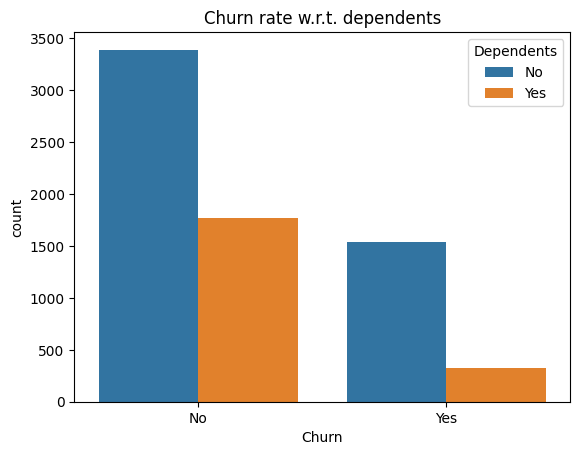

In [32]:
# churn count with respect to status regarding dependents
sns.countplot(x="Churn", hue="Dependents", data=df)
plt.title("Churn rate w.r.t. dependents")

In [33]:
# churn rate by whether the customer has dependents or not
df.groupby("Dependents")["Churn"].apply(lambda x: (x == "Yes").mean() * 100)

Dependents
No     31.279140
Yes    15.531205
Name: Churn, dtype: float64

We can see here that customers who have dependents are **much less likely** to churn than those who do.

Text(0.5, 1.0, 'Churn rate with respect to having phone service')

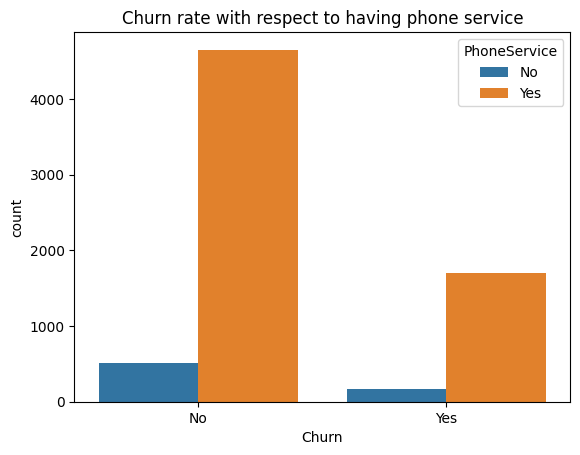

In [34]:
# churn count with respect to whether a user has a phone service with the company or not
sns.countplot(x="Churn", hue="PhoneService", data=df)
plt.title("Churn rate with respect to having phone service")

In [35]:
# crosstab table
service_churn_crosstab = pd.crosstab(df["PhoneService"], df["Churn"])
print(service_churn_crosstab)


Churn           No   Yes
PhoneService            
No             510   170
Yes           4653  1699


In [36]:
# no phone service churner percentage vs all no phone service users
round((df[(df["PhoneService"] == "No") & (df["Churn"] == "Yes")]["Churn"].count() / df[df["PhoneService"] == "No"]["Churn"].count()) * 100)

25

In [37]:
# same as above but for phone service users
round((df[(df["PhoneService"] == "Yes") & (df["Churn"] == "Yes")]["Churn"].count() / df[df["PhoneService"] == "Yes"]["Churn"].count()) * 100)

27

We can see here that there is a higher rate of churners who have a phone service, than churners who do not have a phone service. These rates are very similar, however, so it could be said that having a phone service does not affect churn rate.

We can use **chi-square test** to see if 'PhoneService' and 'Churn' are related.

In [38]:
# importing chi-square test
from scipy.stats import chi2_contingency
# producing table and values
chi2, p, dof, expected = chi2_contingency(service_churn_crosstab)
# outputs
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degress of freedom: {dof}")
print(f"Independent table: {expected}")

Chi-square statistic: 0.8737327674431736
p-value: 0.34992398942431924
Degress of freedom: 1
Independent table: [[ 499.2662116  180.7337884]
 [4663.7337884 1688.2662116]]


We can infer from our chi2 results that the phone service does not have a correlation with whether a customer will churn or not. A Chi-square statistic of **0.87** is incredibly close to 0, and a p-value of **0.35** means that mostly likely our variables are independent of each other.

Text(0.5, 1.0, 'Churn rate with respect to paperless billing rate')

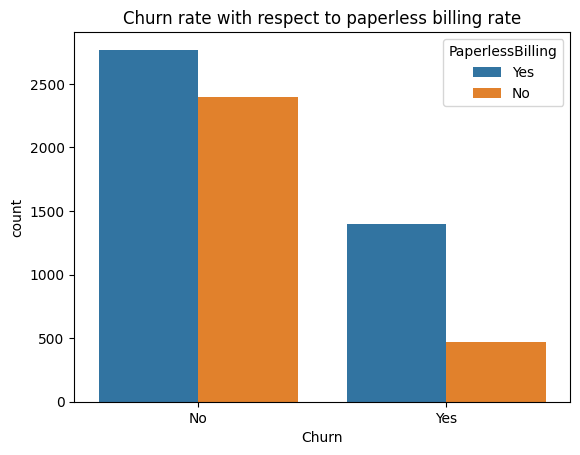

In [39]:
# Churn count with respect to status on paperless billing
sns.countplot(x="Churn", hue="PaperlessBilling", data=df)
plt.title("Churn rate with respect to paperless billing rate")

In [40]:
# churn rate by whether the customer used paperless billing or not 
df.groupby("PaperlessBilling")["Churn"].apply(lambda x: (x == "Yes").mean() * 100)

PaperlessBilling
No     16.375698
Yes    33.589251
Name: Churn, dtype: float64

The **majority** of people who churn tend to have paperless billing.

Text(0.5, 1.0, 'Distribution of customer contract')

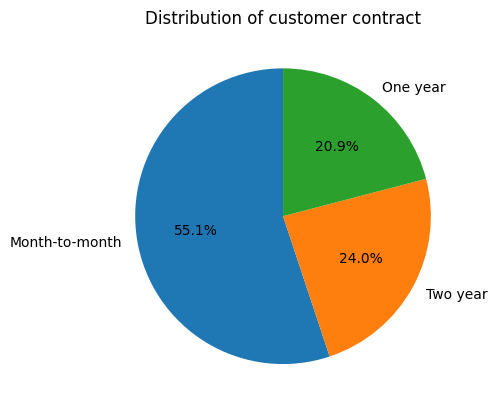

In [41]:
# pie table distritbution of customer contracts in the dataset
counts = df["Contract"].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of customer contract")

Text(0.5, 1.0, 'Churn rate w.r.t. contract')

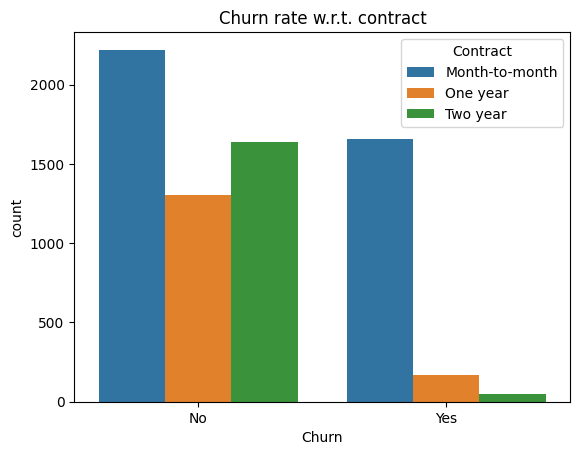

In [42]:
# Churn count with respect to contract
sns.countplot(x="Churn", hue="Contract", data=df)
plt.title("Churn rate w.r.t. contract")

For customers who do not churn, the distribution of contracts seems to be realistic. However, for customers who do end up churning, a **month-to-month** contract is almost always the case. Feedback can be taken from the customers, as this seems to be a pressing issue for those who churn.

In [43]:
# crosstab table
pd.crosstab(df["Contract"], df["Churn"])

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


Out of the customers who defer from the company, **89%** of those were on a month-to-month contract.

Text(0.5, 1.0, 'Churn rate w.r.t. technical support')

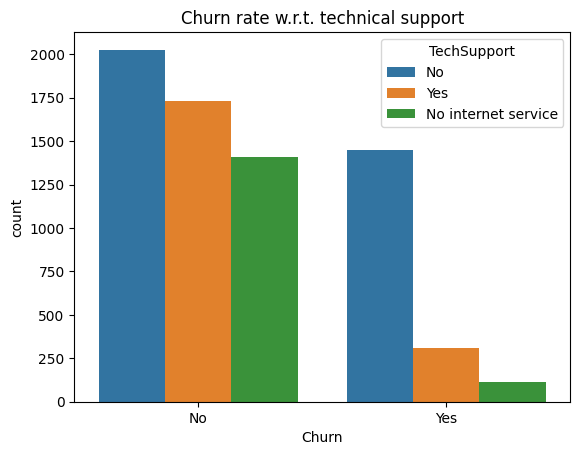

In [44]:
# churn count with respect to technical support status
sns.countplot(x="Churn", hue="TechSupport", data=df)
plt.title("Churn rate w.r.t. technical support")

In [45]:
# churn rate by amount of technical support given to the customer
df.groupby("TechSupport")["Churn"].apply(lambda x: (x == "Yes").mean() * 100)

TechSupport
No                     41.647465
No internet service     7.434211
Yes                    15.196078
Name: Churn, dtype: float64

For the majority of people who left the company, a **major percentage** of them **did not receive technical support**.

Text(0.5, 1.0, 'Churn rate w.r.t. online security')

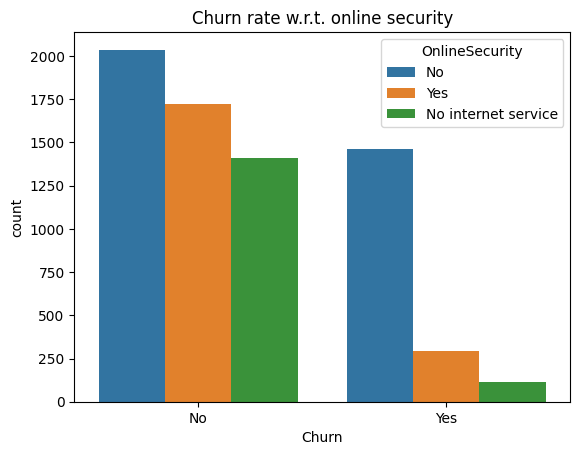

In [46]:
# churn count with respect to status with online security
sns.countplot(x="Churn", hue="OnlineSecurity", data=df)
plt.title("Churn rate w.r.t. online security")

In [47]:
# output percentages of churners for each online security status
df.groupby("OnlineSecurity")["Churn"].apply(lambda x: (x == "Yes").mean() * 100)

OnlineSecurity
No                     41.778667
No internet service     7.434211
Yes                    14.640199
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Churn rate w.r.t. online backup')

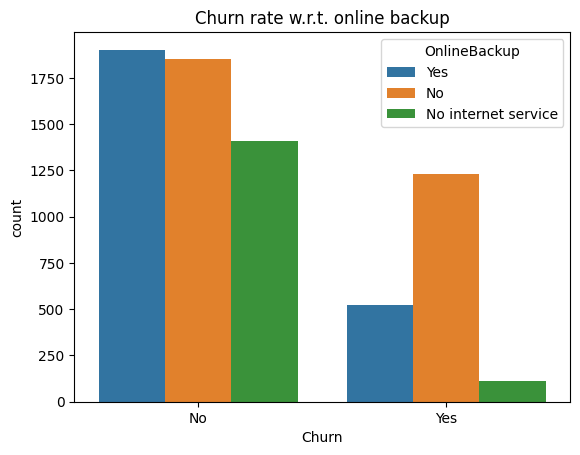

In [48]:
# churn count with respect to online backup status
sns.countplot(x="Churn", hue="OnlineBackup", data=df)
plt.title("Churn rate w.r.t. online backup")

In [49]:
# output percentages of churners for each online backup status
df.groupby("OnlineBackup")["Churn"].apply(lambda x: (x == "Yes").mean() * 100)

OnlineBackup
No                     39.941691
No internet service     7.434211
Yes                    21.567010
Name: Churn, dtype: float64

The **majority of the customers** who churned did **not** have a form of online backup.

Text(0.5, 1.0, 'Churn w.r.t. movie streaming')

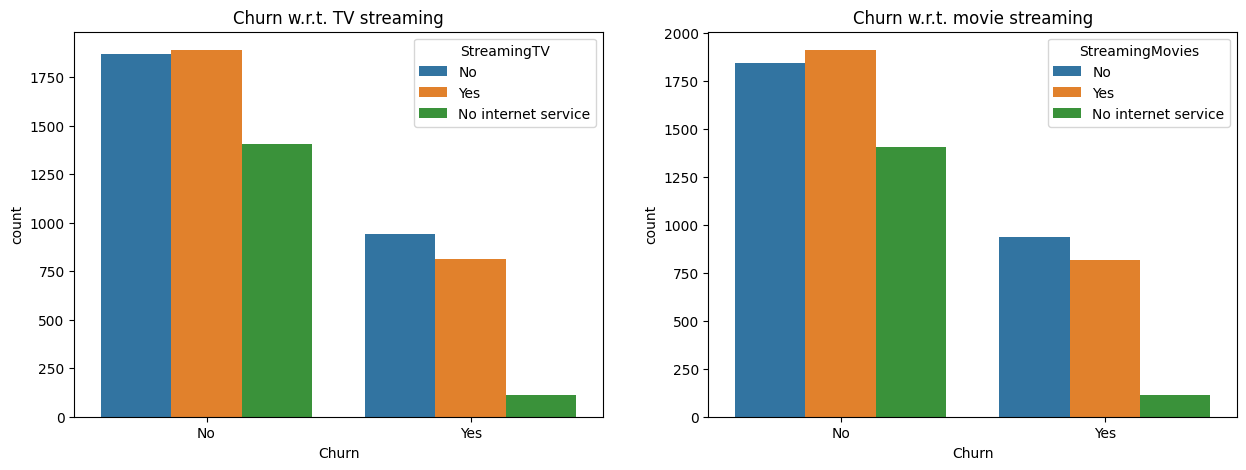

In [50]:
# display both graphs side by side
fig, axes = plt.subplots(1, 2,figsize=(15,5))
# churn count with respect to TV streaming status
sns.countplot(x="Churn", hue="StreamingTV", data=df, ax=axes[0])
axes[0].set_title("Churn w.r.t. TV streaming")
# churn count with respect to movie streaming status
sns.countplot(x="Churn", hue="StreamingMovies", data=df, ax=axes[1])
axes[1].set_title("Churn w.r.t. movie streaming")

In [51]:
# churn rate by whether the customer streams TV or not 
df.groupby("StreamingTV")["Churn"].apply(lambda x: (x == "Yes").mean() * 100)

StreamingTV
No                     33.535066
No internet service     7.434211
Yes                    30.114687
Name: Churn, dtype: float64

To further examine if there is a correlation between streaming TV and churning, we will again bring in a **chi-square** statistic.

In [52]:
# crosstab table with chi-sqaure statistic
cross = pd.crosstab(df["StreamingTV"], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cross)
print(chi2)
print(p)

372.4565019355074
1.324641113169159e-81


In [53]:
# churn rate by whether the customer streams movies or not 
df.groupby("StreamingMovies")["Churn"].apply(lambda x: (x == "Yes").mean() * 100)

StreamingMovies
No                     33.728875
No internet service     7.434211
Yes                    29.952398
Name: Churn, dtype: float64

To further examine if there is a correlation between streaming movies and churning, we will bring in a **chi-square statistic**.

In [54]:
# crosstab table with chi-sqaure statistic
cross = pd.crosstab(df["StreamingMovies"], df["Churn"])
chi2, p, dof, expected = chi2_contingency(cross)
print(chi2)
print(p)

374.2684315732459
5.353560421401324e-82


There is an **extremely strong** association between TV/movie streaming and whether a customer churns or not, with **p-values practically at 0**.

<Axes: xlabel='Churn', ylabel='count'>

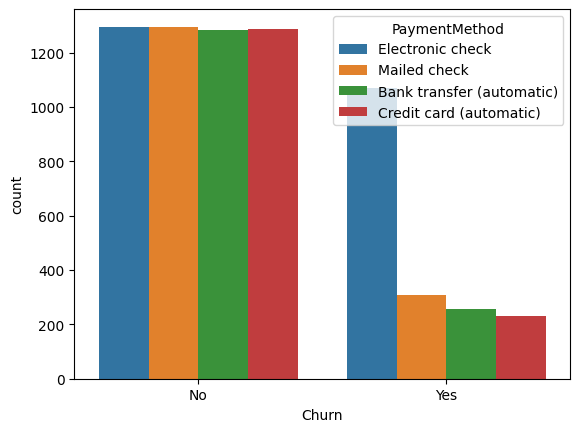

In [55]:
# churn count with respect to payment method used by customer
sns.countplot(x="Churn", hue="PaymentMethod", data=df)

In [56]:
# percentage of each payment method churner
df.groupby("PaymentMethod")["Churn"].apply(lambda x: (x == "Yes").mean() * 100)

PaymentMethod
Bank transfer (automatic)    16.731518
Credit card (automatic)      15.253123
Electronic check             45.285412
Mailed check                 19.201995
Name: Churn, dtype: float64

For customers who left the company, **45%** of them used electronic check as a form of payment, **roughly 3x as many customers who used an automatic credit card system**.

<Axes: xlabel='Churn', ylabel='count'>

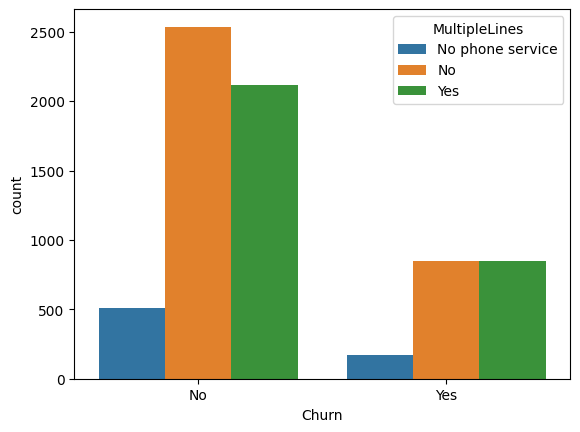

In [57]:
# churn count with respect to if the customer had multiple lines (multiple line status)
sns.countplot(x="Churn", hue="MultipleLines", data=df)

In [58]:
# output percentage of churners for each multiple lines status
df.groupby("MultipleLines")["Churn"].apply(lambda x: (x == "Yes").mean() * 100)

MultipleLines
No                  25.081241
No phone service    25.000000
Yes                 28.648466
Name: Churn, dtype: float64

Customers without phone service have much lower numbers in both churn and non-churn statuses; this is a smaller segment overall. The churn rate seems similar between customers with/without multiple lines.

<Axes: xlabel='Churn', ylabel='count'>

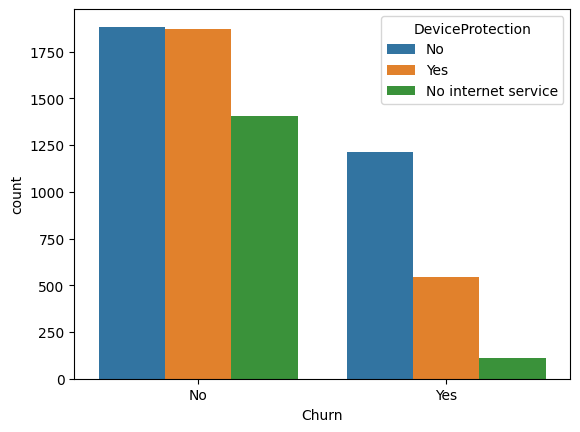

In [59]:
# churn count with respect to device protection
sns.countplot(x="Churn", hue="DeviceProtection", data=df)

In [60]:
df.groupby("DeviceProtection")["Churn"].apply(lambda x: (x == "Yes").mean() * 100)

DeviceProtection
No                     39.140271
No internet service     7.434211
Yes                    22.539289
Name: Churn, dtype: float64

The **majority of customers** who churned did not have any protection with their device. The company could help this by providing more incentives for the customer to also purchase device protection. This, according to the data, could reduce the amount of customers leaving the company.

## Section 4 - Different classification models 

The first model we will prepare our data for is a logistic regression model. For this model, numerical features are mandatory so our categorical data will need to be transformed. Due to some of our categorical columns being binary (Yes/No) and some being nomical, different transformations will be taken.

In [61]:
# drop unneeded columns 
df = df.drop(["customerID", "gender"], axis=1)

# gather binary columns and convert each value in each column to 1 or 0 (Yes or No)
binary_cols = ["Partner", "Dependents", "PaperlessBilling", "PhoneService", "Churn"]
df[binary_cols] = df[binary_cols].replace({"Yes": 1, "No": 0})

/tmp/ipykernel_36/3568558539.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({"Yes": 1, "No": 0})


In [62]:
# one hot encoding our nominal categorical data
nominal_cols = ["MultipleLines", "InternetService", "OnlineSecurity", 
                "OnlineBackup", "DeviceProtection", "TechSupport", 
                "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"]
df_encoded = pd.get_dummies(df, columns=nominal_cols, drop_first=True)


In [63]:
# output new dtypes of columns
df_encoded.dtypes

SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes     

In [64]:
# importing train_test_split, scaler tool and model 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# setting X and y, features and target
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

# fit and transform feature data 
scaler = StandardScaler()
scaler.fit_transform(X)

# split into training and testing data, random state of 42 ensures reproducibility of the split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

# initilialise and fit logistic regression model
lr = LogisticRegression()
lr.fit(train_x, train_y)

# evaluate accuracy on training data
print(lr.score(train_x, train_y))

# importing confusion matrix
from sklearn.metrics import confusion_matrix 

# predicted target values from testing data
pred_y = lr.predict(test_x)

# output confusion matrix
c_matrix = confusion_matrix(test_y, pred_y)
print(c_matrix)

# Confusion Matrix Layout (Binary Classification)
# 
#                  Predicted
#                  No       Yes
# Actual  No      [TN]      [FP]
#         Yes     [FN]      [TP]
#
# TN = True Negative   -> Model predicted No, actual was No
# FP = False Positive  -> Model predicted Yes, actual was No
# FN = False Negative  -> Model predicted No, actual was Yes
# TP = True Positive   -> Model predicted Yes, actual was Yes


0.8065984072810012
[[1157  143]
 [ 227  231]]


Text(0.5, 23.52222222222222, 'Predicted')

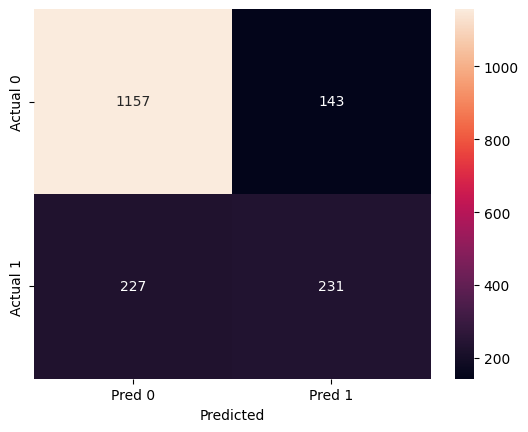

In [65]:
# heatmap for this confusion matrix
sns.heatmap(c_matrix, annot=True, fmt="d", xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")


In [66]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(test_y, pred_y)
precision = precision_score(test_y, pred_y)
f1 = f1_score(test_y, pred_y)

print(f"recall score: {recall}")
print(f"precision score: {precision}")
print(f"f1-score: {f1}")

recall score: 0.5043668122270742
precision score: 0.6176470588235294
f1-score: 0.5552884615384616


Accuracy is fairly high, but this can be misleading if classes are imbalanced.

Recall is low (**~50%**), meaning the model misses about half of the actual positives.

Precision is moderate (**~62%**), so when it predicts positive, it's correct ~62% of the time.

Overall, the model is **better at predicting negatives than positives**.

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(train_x, train_y)

y_pred = knc.predict(test_x)

c_matrix = confusion_matrix(test_y, y_pred)
print(c_matrix)

print(recall_score(test_y, y_pred))
print(precision_score(test_y, y_pred))
print(f1_score(test_y, y_pred))

[[1151  149]
 [ 259  199]]
0.4344978165938865
0.5718390804597702
0.4937965260545906


Recall (**~43%**) is low, the model misses more than half of the actual positives.

Precision (**~57%**) is moderate: when it predicts positive, it's correct just over half the time.

Overall, the model is better at predicting negatives, and it struggles to effectively catch churn cases.

Text(0.5, 23.52222222222222, 'Predicted')

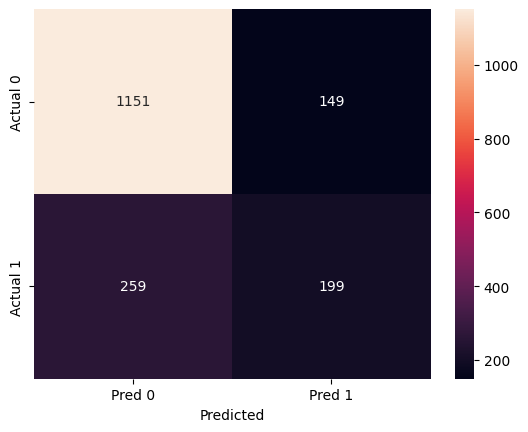

In [68]:
# heatmap for this confusion matrix
sns.heatmap(c_matrix, annot=True, fmt="d", xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")


In [69]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42, max_depth=5)
dtc.fit(train_x, train_y)

y_pred = dtc.predict(test_x)

c_matrix = confusion_matrix(test_y, y_pred)
print(c_matrix)

print(recall_score(test_y, y_pred))
print(precision_score(test_y, y_pred))
print(f1_score(test_y, y_pred))


[[1105  195]
 [ 193  265]]
0.5786026200873362
0.5760869565217391
0.5773420479302832


Precision (**~58%**) means that when the model predicts churn, it is correct 58% of the time.

Recall (**~58%**) means the model identifies about 58% of actual churners.

F1 Score (**~58%**) shows a balanced trade-off between precision and recall.

Text(0.5, 23.52222222222222, 'Predicted')

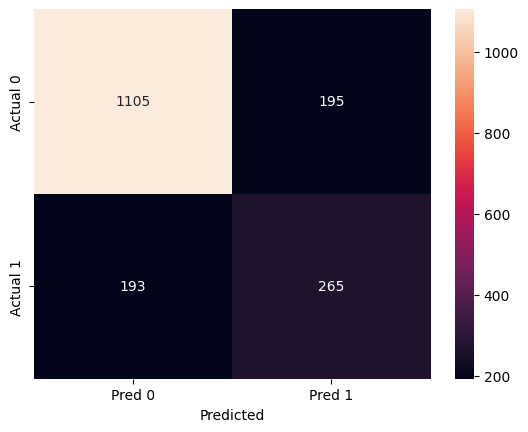

In [70]:
# heatmap for this confusion matrix
sns.heatmap(c_matrix, annot=True, fmt="d", xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")

## Model conclusion 

Out of the three models used on this data, the best model seems to be the **decision tree classifier**. There seems to be a higher trade-off between precision and recall than the other models. Despite the logistic regression model's precision being **~62%**, it has a lower recall (**~50%**) percentage than the decision tree model (**~58%**). The metrics for the decision tree model also seem to be consistent, which can't be said for the previous two models.

Overall, all of the models did not produce the high metrics that I was looking for. In the future, I may revisit this to tune hyperparameters and to better understand the features I used. This could bring better results in the future. 

## Section 5 - Overall Conclusion

This project successfully used Exploratory Data Analysis (EDA) and machine learning models to predict customer churn for a telecom company. The data preprocessing steps included handling missing values and converting data types. This ensured the dataset was suitable for analysis.

The EDA revealed key insights: tenure, monthly charges, contract type and TV/movie streaming have strong links to whether a customer churns or not. Specifically, customers with lesser tenures, higher charges and those on a month-to-month contract are more likely to leave.

Whenever visualisations were made, evaluations were made alongside potential ways for the company to combat high churn rates. These fixes included gathering feedback from customers, giving discounts/offers, family bundles and customer incentives.

In terms of model performance, the decision tree classifier was the best performing model. It achieved the most consistent metrics of all the models. The other models used (a logistic regression and K-Nearest Neighbours model) did not perform as well. Despite this, the tree model still did not perform as well as expected. This could possibly be amended in the future by tuning hyperparameters and overlooking my feature engineering, possibly taking a different approach. Overall, the tree model has been shown to be the best model at this current time for predicting whether a customer will churn or not.